##### Selecionando apenas as colunas que nos interessam:

In [2]:
#Importando Pacote Pandas
import pandas as pd

#Importando Base de Dados
microdadosEnem = pd.read_csv("microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1') 

MemoryError: Unable to allocate 1.40 GiB for an array with shape (37, 5095171) and data type object

##### Criarmos um novo Dataframe apenas com os dados que serão analisados:

In [ ]:
colunaSelecionadas = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']

##### Visualizar a cabeça (head) do Dataframe:

In [7]:
microdadosEnemSelecionados = microdadosEnem.filter(items=colunaSelecionadas)

In [8]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,NaN,NaN,B,B
1,190001421546,NaN,NaN,C,E
2,190001133210,NaN,NaN,E,E
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E


##### O que é esse tal de NaN?
NaN: significa Not a Number, que quer dizer que não é um número.

In [9]:
microdadosEnemSelecionados = microdadosEnemSelecionados.dropna()

In [10]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E
5,190001782198,675.3,800.0,B,B
6,190001421548,594.7,600.0,E,B
9,190001592266,480.7,400.0,E,E


#### Finalmente: O questionário de indicadores socioeconômicos!
Começaremos pelas duas primeiras questões:

    Q001: Até que série seu pai, ou o homem responsável por você, estudou?
    Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?

##### Passo 1 - Definirmos um dicionário:
  Faremos isso para visualizar melhor o resultado

In [11]:
dicionarioQuestao = {
  'A' :	'Nunca estudou.',
  'B'	: 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
  'C'	: 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
  'D'	: 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
  'E'	: 'Completou o Ensino Médio, mas não completou a Faculdade.',
  'F'	: 'Completou a Faculdade, mas não completou a Pós-graduação.',
  'G'	: 'Completou a Pós-graduação.',
  'H'	: 'Não sei.'
}

In [1]:
microdadosEnemSelecionados.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

NameError: name 'microdadosEnemSelecionados' is not defined

##### Passo 2 - Criar novas colunas no Dataframe:
Inserir coluna NO_Q001 e NO_Q002:

In [13]:
microdadosEnemSelecionados['NO_Q001'] = [dicionarioQuestao[resp] for resp in microdadosEnemSelecionados.Q001]

In [14]:
microdadosEnemSelecionados['NO_Q002'] = [dicionarioQuestao[resp] for resp in microdadosEnemSelecionados.Q002]

In [15]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
3,190001199383,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


##### Passo 3 - Comparando a distribuição do nível de escolaridade PaixMãe no conjunto de dados
Utilizando os métodos do Dataframe filter(), groupby(), count(), sort_values()

documentação disponível em:

1 - Distribuição dos candidatos do ENEM 2018 por escolaridade do Pai

In [16]:
microdadosEnemSelecionados.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values('NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",1006235
Não completou a 4ª série/5º ano do Ensino Fundamental.,752547
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",515771
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",433183
"Completou a Faculdade, mas não completou a Pós-graduação.",308305
Não sei.,306162
Completou a Pós-graduação.,193523
Nunca estudou.,186183


2 - Distribuição dos candidatos do ENEM 2018 por escolaridade do Mãe

In [17]:
microdadosEnemSelecionados.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values('NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",1234749
Não completou a 4ª série/5º ano do Ensino Fundamental.,551509
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",475767
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",471811
"Completou a Faculdade, mas não completou a Pós-graduação.",416276
Completou a Pós-graduação.,333148
Nunca estudou.,121017
Não sei.,97632


##### Passo 4 - Olhando o desempenho em matemática segundo a escolaridade PaixMãe

1 - Por escolaridade do Pai

In [18]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001')\
                                                                 .mean()\
                                                                 .sort_values(by='NU_NOTA_MT', ascending= False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,624.117908
"Completou a Faculdade, mas não completou a Pós-graduação.",600.306673
"Completou o Ensino Médio, mas não completou a Faculdade.",538.924341
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",515.746130
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",505.399008
Não sei.,495.476300
Não completou a 4ª série/5º ano do Ensino Fundamental.,486.457007
Nunca estudou.,466.099282


2 - Por escolaridade do Mãe

In [19]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending= False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,598.918643
"Completou a Faculdade, mas não completou a Pós-graduação.",583.322703
"Completou o Ensino Médio, mas não completou a Faculdade.",528.316576
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",505.048227
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",496.049951
Não sei.,484.995799
Não completou a 4ª série/5º ano do Ensino Fundamental.,480.072086
Nunca estudou.,459.860654


##### Passo 5 - Olhando o desempenho em redação segundo a escolaridade PaixMãe

1 - Por escolaridade do Pai

In [21]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001')\
                                                                      .mean()\
                                                                      .sort_values(by='NU_NOTA_REDACAO', ascending= False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,700.471365
"Completou a Faculdade, mas não completou a Pós-graduação.",673.472243
"Completou o Ensino Médio, mas não completou a Faculdade.",604.807923
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",574.549648
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",558.369005
Não sei.,537.055676
Não completou a 4ª série/5º ano do Ensino Fundamental.,532.602535
Nunca estudou.,496.081597


In [22]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,676.235007
"Completou a Faculdade, mas não completou a Pós-graduação.",655.619877
"Completou o Ensino Médio, mas não completou a Faculdade.",591.132044
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",558.915688
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",543.681474
Não completou a 4ª série/5º ano do Ensino Fundamental.,522.131933
Não sei.,505.261185
Nunca estudou.,482.739450


In [25]:
q002redacao = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)
q001redacao = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)
q002matematica = microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending= False)
q001matematica = microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending= False)

<AxesSubplot:xlabel='NO_Q001'>

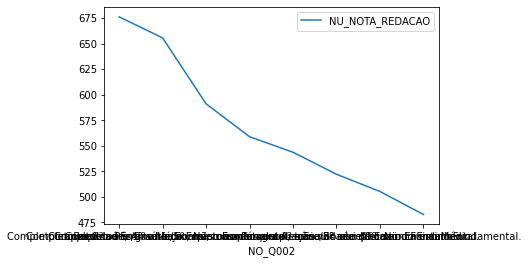

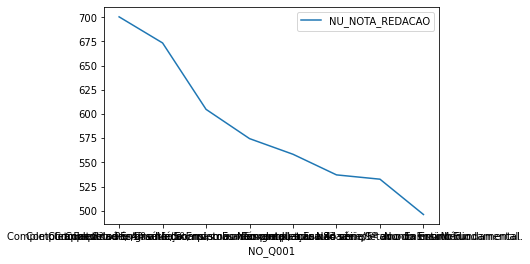

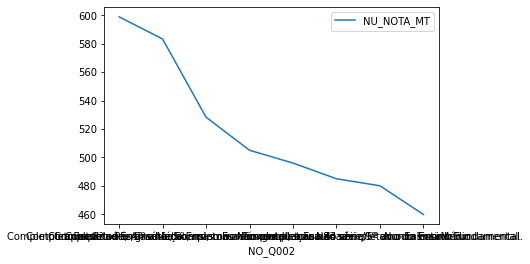

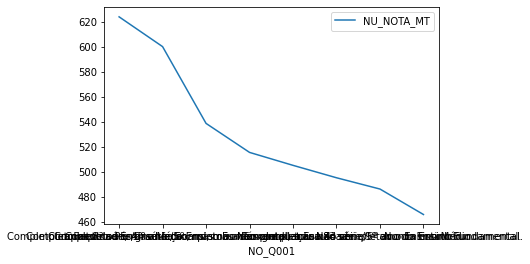

In [26]:
q002redacao.plot()
q001redacao.plot()
q002matematica.plot()
q001matematica.plot()

In [31]:
describeQ001 = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()

In [32]:
describeQ001

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        515771.0   
Completou a 8ª série/9º ano do Ensino Fundament...        433183.0   
Completou a Faculdade, mas não completou a Pós-...        308305.0   
Completou a Pós-graduação.                                193523.0   
Completou o Ensino Médio, mas não completou a F...       1006235.0   
Nunca estudou.                                            186183.0   
Não completou a 4ª série/5º ano do Ensino Funda...        752547.0   
Não sei.                                                  306162.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  558.369005  175.472919   
Completou a 8ª série/9º ano do Ensino Fundament...  574.549648  176.013256   
Completou a Faculdade, mas não completou a Pós-...  673.472243  170.941585   
Completou a Pós-graduação.                          700.471365  169.925738   
Completou o Ensino Médio, mas não completou a F...  604.807923  175.241440   
Nunca estudou.                                      496.081597  180.970306   
Não completou a 4ª série/5º ano do Ensino Funda...  532.602535  172.019402   
Não sei.                                            537.055676  182.576826   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  480.0  560.0  640.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  500.0  580.0  680.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  660.0  800.0   
Completou a Pós-graduação.                          0.0  600.0  700.0  840.0   
Completou o Ensino Médio, mas não completou a F...  0.0  520.0  600.0  700.0   
Nunca estudou.                                      0.0  420.0  520.0  600.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  460.0  560.0  620.0   
Não sei.                                            0.0  460.0  560.0  640.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação.                          1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou.                                      1000.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei.                                            1000.0